In [2]:
import keras

Using TensorFlow backend.


In [3]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation="relu"))
model.add(layers.Dense(6,activation="sigmoid"))

In [5]:
from PIL import Image
import os, glob
import numpy as np
import random, math
import os
import cv2


categories = ['haruna', 'halonen', 'shrek', 'kadono', 'michael', 'stella', ]


X = []

Y = []

def make_sample(files):
    global X, Y
    X = []
    Y = []
    for cat, fname in files:
        add_sample(cat, fname)
    return np.array(X), np.array(Y)


def add_sample(cat, fname):
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((150, 150))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)


allfiles = []
alldirectories = []
path = os.path.abspath('../')

for name in categories:
    alldirectories.append((path + '\{}_picture'.format(name)))

for directory in alldirectories:
    for index in range(0, 5):
        for num in range(0, 20):
            images = directory + '\{}_{}.jpg'.format(index, num)
            allfiles.append((index, images))     


random.shuffle(allfiles)
th = math.floor(len(allfiles) * 0.8)
train = allfiles[0:th]
test  = allfiles[th:]
X_train, y_train = make_sample(train)
X_test, y_test = make_sample(test)
xy = (X_train, X_test, y_train, y_test)

np.save(path + "/all_pictures.npy", xy)

In [89]:
from keras import optimizers

model.compile(loss="binary_crossentropy",
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=["acc"])

In [90]:
from keras.utils import np_utils
import numpy as np

nb_classes = len(categories)

X_train, X_test, y_train, y_test = np.load(path + '/all_pictures.npy', allow_pickle=True)


X_train = X_train.astype("float") / 255
X_test  = X_test.astype("float")  / 255


y_train = np_utils.to_categorical(y_train, nb_classes)
y_test  = np_utils.to_categorical(y_test, nb_classes)

In [91]:
model = model.fit(X_train,
                  y_train,
                  epochs=10,
                  batch_size=6,
                  validation_data=(X_test,y_test))

Train on 480 samples, validate on 120 samples
Epoch 1/10
480/480 [==============================] - 34s 71ms/step - loss: 0.4416 - acc: 0.8288 - val_loss: 0.4290 - val_acc: 0.8333
Epoch 2/10
480/480 [==============================] - 32s 67ms/step - loss: 0.4259 - acc: 0.8333 - val_loss: 0.4391 - val_acc: 0.8333
Epoch 3/10
480/480 [==============================] - 33s 68ms/step - loss: 0.4230 - acc: 0.8333 - val_loss: 0.4222 - val_acc: 0.8333
Epoch 4/10
480/480 [==============================] - 33s 69ms/step - loss: 0.4174 - acc: 0.8333 - val_loss: 0.4194 - val_acc: 0.8333
Epoch 5/10
480/480 [==============================] - 33s 69ms/step - loss: 0.4088 - acc: 0.8333 - val_loss: 0.4306 - val_acc: 0.8333
Epoch 6/10
480/480 [==============================] - 33s 69ms/step - loss: 0.3990 - acc: 0.8340 - val_loss: 0.4311 - val_acc: 0.8319
Epoch 7/10
480/480 [==============================] - 33s 68ms/step - loss: 0.3862 - acc: 0.8372 - val_loss: 0.4363 - val_acc: 0.8319
Epoch 8/10
480/4

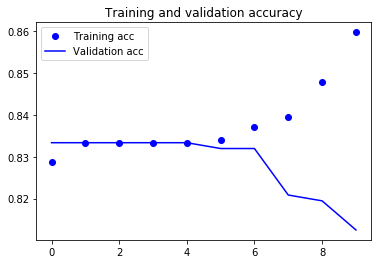

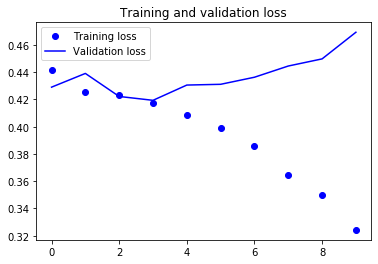

In [92]:
import matplotlib.pyplot as plt

acc = model.history['acc']
val_acc = model.history['val_acc']
loss = model.history['loss']
val_loss = model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig('data_accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig('loss_value')

In [93]:
allfiles = []
alldirectories = []
path = os.path.abspath('../')

for name in categories:
    alldirectories.append((path + '\{}_picture'.format(name)))
for directory in alldirectories:
    for index in range(0, 5):
        for num in range(0, 20):
            images = directory + '\{}_{}.jpg'.format(index, num)
            allfiles.append((index, images))  



for cat, fname in allfiles:
    img = Image.open(fname)
    img = img.convert("RGB")
    img = img.resize((150, 150))
    data = np.asarray(img)
    X.append(data)
    Y.append(cat)

x = np.array(X)
y = np.array(Y)        

In [94]:

from keras.utils import np_utils

y = np_utils.to_categorical(y, 6)

score = model.model.evaluate(x,y)

print('loss=', score[0])
print('accuracy=', score[1])

720/720 [==============================] - 11s 15ms/step
loss= 41.18924958970812
accuracy= 0.8506944179534912
